In [76]:
import tensorflow as tf 
import matplotlib.pyplot as plt
from tensorflow.keras import models,layers,optimizers
import numpy as np

In [77]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
ChannelS = 3
EPOCHS = 10

In [78]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Plant Village",
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size= BATCH_SIZE,
)

Found 2152 files belonging to 3 classes.


In [79]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [80]:
len(dataset)

68

In [81]:
for image_batch, labels_batch in dataset:
    print(image_batch.shape)
    print(labels_batch.numpy())
    break

(32, 256, 256, 3)
[0 0 1 2 0 0 0 0 1 1 1 1 0 1 0 1 0 0 2 0 1 0 1 1 1 1 2 1 0 1 0 0]


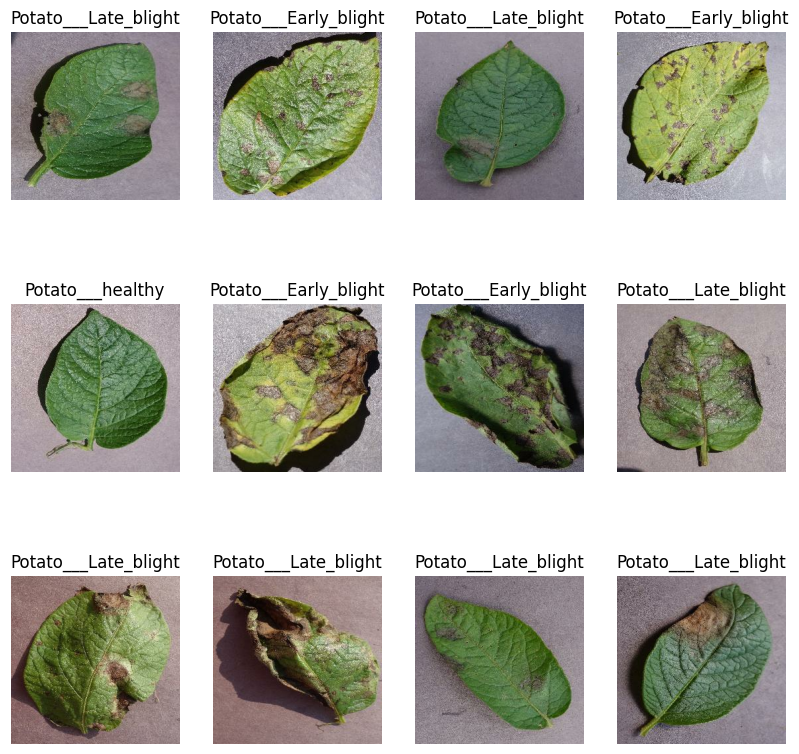

In [82]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")
        

In [83]:
len(dataset)

68

In [84]:
train_size = 0.8 
len(dataset)*train_size

54.400000000000006

In [85]:
train_ds = dataset.take(54)
len(train_ds)

54

In [86]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [87]:
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [88]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [89]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [90]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [91]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [92]:

len(train_ds)

54

In [93]:
len(val_ds)

6

In [94]:
len(test_ds)

8

In [95]:

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [96]:
import tensorflow as tf
from tensorflow.keras import layers

# Use the non-experimental path
resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.Rescaling(1./255),
])

In [97]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    ])

In [98]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, ChannelS)
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, ChannelS)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.build(input_shape=input_shape)
model.summary()

c:\Users\Latitude\.conda\envs\tensorflow_env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_3 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_4 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (32, 230400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (32, 64)               │    14,745,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (32, 10)               │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,802,634 (56.47 MB)

 Trainable params: 14,802,634 (56.47 MB)

 Non-trainable params: 0 (0.00 B)

In [99]:
model.compile(
    optimizer='adam' , 
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [100]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    verbose=1,
    batch_size=BATCH_SIZE

)

Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 150s 3s/step - accuracy: 0.7037 - loss: 0.8115 - val_accuracy: 0.6198 - val_loss: 0.8507
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 140s 3s/step - accuracy: 0.8293 - loss: 0.4120 - val_accuracy: 0.8333 - val_loss: 0.3853
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 141s 3s/step - accuracy: 0.9091 - loss: 0.2381 - val_accuracy: 0.8750 - val_loss: 0.3450
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 139s 3s/step - accuracy: 0.9236 - loss: 0.1930 - val_accuracy: 0.9219 - val_loss: 0.1721
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 161s 3s/step - accuracy: 0.9352 - loss: 0.1624 - val_accuracy: 0.8854 - val_loss: 0.3329
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 180s 3s/step - accuracy: 0.9456 - loss: 0.1367 - val_accuracy: 0.7604 - val_loss: 0.8784
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 173s 3s/step - accuracy: 0.9583 - loss: 0.1090 - val_accuracy: 0.8542 - val_loss: 0.4753
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 145s 3s/step - accuracy: 0.9468 - loss: 0.1646 - val_accuracy: 0.9323 - v

In [101]:
scores = model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 431ms/step - accuracy: 0.7734 - loss: 0.8865


In [102]:
history

In [103]:
history.history['accuracy']

[0.7037037014961243,
 0.8292824029922485,
 0.9091435074806213,
 0.9236111044883728,
 0.9351851940155029,
 0.9456018805503845,
 0.9583333134651184,
 0.9467592835426331,
 0.96875,
 0.96875]

In [104]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Accuracy')

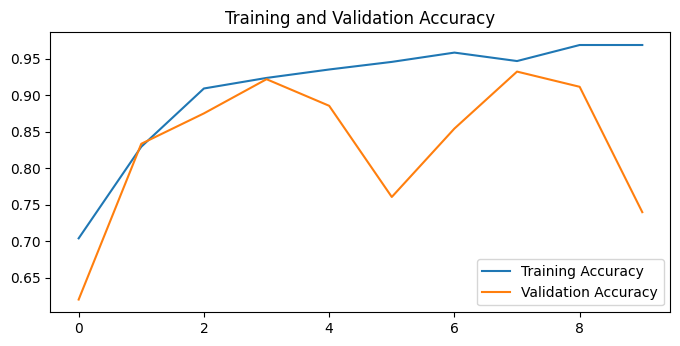

In [108]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(range(EPOCHS) , acc, label='Training Accuracy')
plt.plot(range(EPOCHS) ,  val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')



first image to predict
actual label: Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 835ms/step
predicted label: Potato___Early_blight


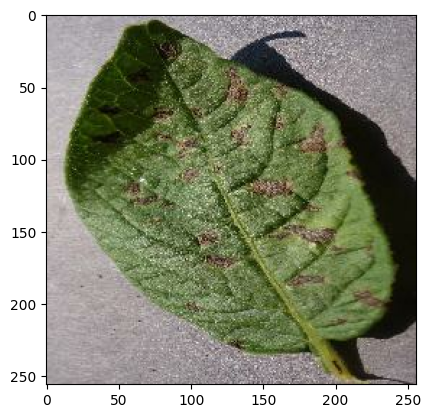

In [109]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [110]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


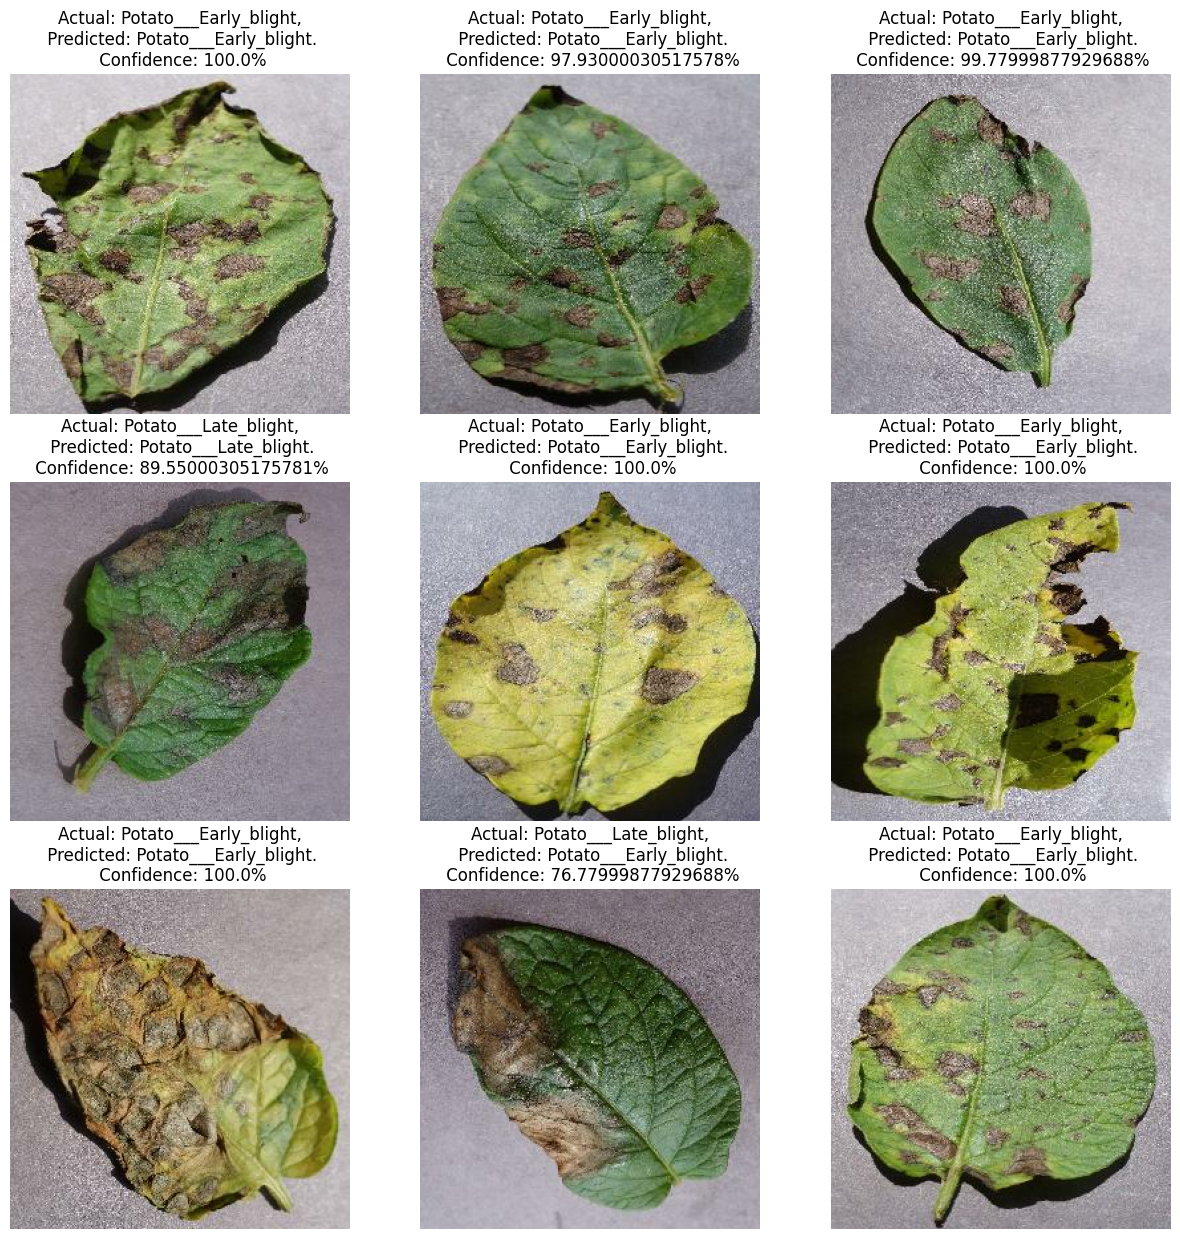

In [111]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [113]:
model.save("../potatoes.h5")